In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
Dataset = pd.read_csv('heart.csv')
Dataset.drop(['education'],axis=1,inplace=True)
Dataset.dropna(axis=0,inplace=True)

In [4]:
# sca = StandardScaler()
# X = Dataset.drop(['TenYearCHD'],axis=1)
# y = Dataset['TenYearCHD']
# X[["age", "currentSmoker","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]] = sca.fit_transform(Dataset[["age","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]])
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
# print(X)

In [5]:
# Assuming Dataset is your DataFrame

sca = StandardScaler()
X = Dataset.drop(['TenYearCHD'], axis=1)
y = Dataset['TenYearCHD']

# Scale only specific columns
columns_to_scale = ["age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]
X[columns_to_scale] = sca.fit_transform(Dataset[columns_to_scale])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

print(X)


      male       age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0        1 -1.234664              0   -0.755427     0.0                0   
1        0 -0.417687              0   -0.755427     0.0                0   
2        1 -0.184266              1    0.922305     0.0                0   
3        0  1.332976              1    1.761172     0.0                0   
4        0 -0.417687              1    1.173965     0.0                0   
...    ...       ...            ...         ...     ...              ...   
4231     1  0.982843              0   -0.755427     0.0                0   
4232     1  2.149953              0   -0.755427     0.0                0   
4233     1  0.049156              1   -0.671541     0.0                0   
4234     1  0.165867              1    2.851698     0.0                0   
4237     0  0.282578              0   -0.755427     0.0                0   

      prevalentHyp  diabetes   totChol     sysBP     diaBP       BMI  \
0              

In [6]:
Log_R=LogisticRegression(penalty='l2')
Log_R.fit(X_train,y_train)

LogisticRegression()

In [7]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=Log_R.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Score = ', Log_R.score(X_test,y_test))

[[1031    5]
 [ 184   18]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1036
           1       0.78      0.09      0.16       202

    accuracy                           0.85      1238
   macro avg       0.82      0.54      0.54      1238
weighted avg       0.84      0.85      0.79      1238

Score =  0.8473344103392568


In [8]:
with open('dicease.pkl','wb') as files:
    pickle.dump(Log_R,files)

<Axes: title={'center': 'Correlation Graph'}>

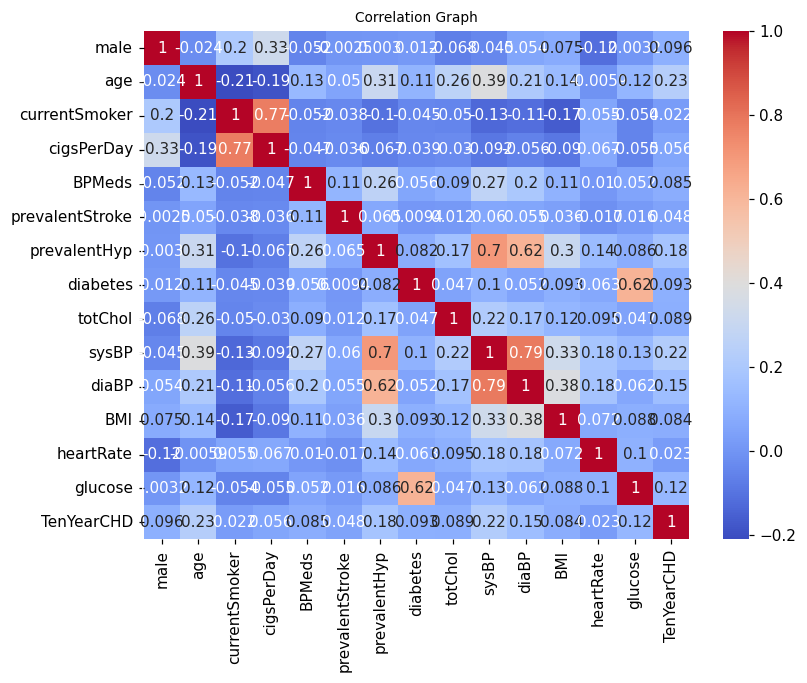

In [16]:
plt.figure (figsize = [8,6],  dpi = 110 )
plt.title ("Correlation Graph" , fontsize = 9 )
sns.heatmap (Dataset.corr(), annot = True , cmap="coolwarm" )